# 1.逻辑回归

In [1]:
import pandas as pd
import numpy as np #矩阵运算
import matplotlib.pyplot as plt
import seaborn as sns #图形显示
plt.style.use('fivethirtyeight') #样式美化
from sklearn.metrics import classification_report

data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
#data.head()不打括号没有格式
data.head()


,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


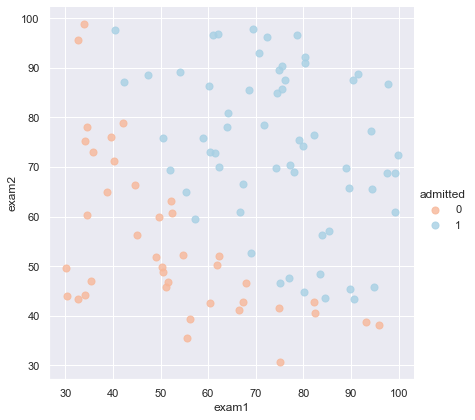

In [2]:
sns.set(context='notebook',style = "darkgrid",palette = sns.color_palette("RdBu",2))
#视频展示的函数sns.lmplot()已经更新了，以下为不报错的用法
sns.lmplot(x = 'exam1',y = 'exam2',hue='admitted',data=data,
           height=6, 
           fit_reg = False,
           scatter_kws={"s": 50})
plt.show()

In [3]:
#读取特征
def get_X(df):
    
    #生成一个m行全为1的列向量
    ones = pd.DataFrame({'ones':np.ones(len(df))})
    #将全为1的列向量和输入的向量根据列进行合并
    data = pd.concat([ones,df],axis = 1)
    
    return data.iloc[:,:-1].values

#读取标签
def get_y(df):
    
    return np.array(df.iloc[:,-1])

#归一化
def normalize_feature(df):
    
    #lambda表示对所有的column做一个循环,data2.std()样本标准偏差
    return df.apply(lambda column:(column - column.mean())/column.std())

In [4]:
X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)

(100, 3)
(100,)


# sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

In [5]:
def sigmoid(z):
    
    gz = 1 / (1 + np.exp(-z))
    
    return gz

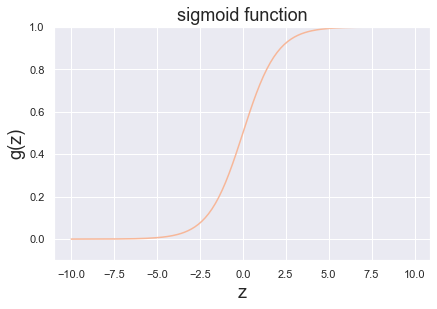

In [6]:
fig , ax = plt.subplots()
ax.plot(np.arange(-10,10,step=0.1),sigmoid(np.arange(-10,10,step=0.1)))
ax.set_ylim((-0.1,1))
ax.set_xlabel('z',fontsize=18)
ax.set_ylabel('g(z)',fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

# cost function(代价函数)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function

$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$

In [7]:
theta = np.zeros(3)

def cost(theta,X,y):
    
    #X @ theta 等价于 X.dot(theta)
    temp = -y * np.log(sigmoid(X@theta))-(1-y)*np.log(1-sigmoid(X@theta))
    costf = np.mean(temp)
    
    return costf

    
cost(theta,X,y)

0.6931471805599453

# gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [8]:
def gradient(theta,X,y):
    
    return 1/len(X)*X.T@(sigmoid(X@theta)-y)

gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

# 拟合参数

In [9]:
import scipy.optimize as opt

res = opt.minimize(fun = cost, x0 = theta, args = (X,y),method = 'Newton-CG',jac = gradient)
print(res)

     fun: 0.2034977382341543
     jac: array([9.62546326e-06, 2.86715425e-04, 3.28834357e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 28
    njev: 182
  status: 0
 success: True
       x: array([-25.14563992,   0.20610619,   0.20134461])


# 用训练集预测和验证

In [10]:
def predict(x,theta):
    
    prob = sigmoid(X@theta)
    return (prob >=0.5).astype(int) #.astype(“具体的数据类型”) 定义数据类型

final_theta = res.x
y_pred = predict(X,final_theta)

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



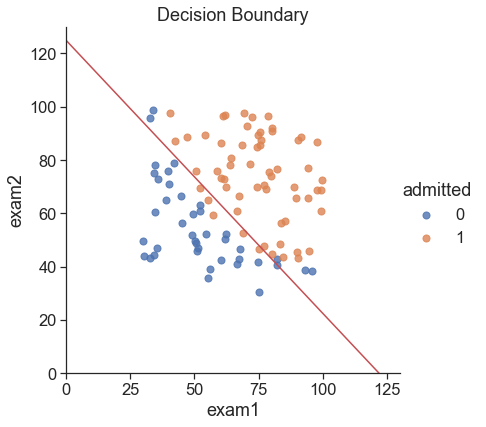

In [11]:
coef = -(res.x / res.x[2])
x = np.arange(130,step=0.1)
y = coef[0]+coef[1]*x

sns.set(context="notebook",style="ticks",font_scale=1.5)
sns.lmplot(x = 'exam1',y = 'exam2',hue='admitted',data=data,
           height=6, 
           fit_reg = False,
           scatter_kws={"s": 50})
plt.plot(x,y,'r')
plt.xlim(0,130)
plt.ylim(0,130)
plt.title('Decision Boundary')
plt.show()

# 2 基于正则化的逻辑回归

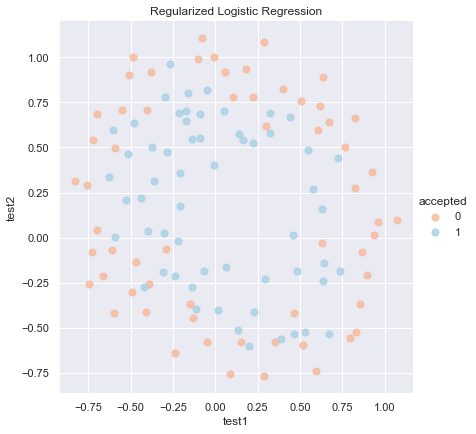

In [12]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
#data.head()不打括号没有格式
df.head()

sns.set(context='notebook',style = "darkgrid",palette = sns.color_palette("RdBu",2))
#视频展示的函数sns.lmplot()已经更新了，以下为不报错的用法
sns.lmplot(x = 'test1',y = 'test2',hue='accepted',data=df,
           height=6, 
           fit_reg = False,
           scatter_kws={"s": 50})
plt.title('Regularized Logistic Regression')
plt.show()

# feature mapping（特征映射）
将低维度的数据映射到高维度
```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```

In [13]:
def feature_mapping(x,y,power,as_ndarray=False):
    
    #构造函数f，f有两个参数分别是(i-p,p)，f的表达式为np.power(x,i-p)*np.power(y,p)
    data = {"f{}{}".format(i - p,p):np.power(x,i-p) * np.power(y,p)
                for i in np.arange(power+1)
                for p in np.arange(i+1)
           }
    
    #将数据格式转换为矩阵的形式
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)


In [14]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [15]:
theta = np.zeros(data.shape[1])
X = feature_mapping(x1,x2,power = 6,as_ndarray = True)
y = get_y(df)

def regularsized_cost(theta,X,y,l=1):
    
    #theta取了一个子集，不包括theta0
    theta_j1_to_n = theta[1:]
    regularized_term = (l/(2*len(X)))*np.power(theta_j1_to_n,2).sum()
    
    return cost(theta,X,y)+regularized_term
                        
# 当theta设置为0的时候，正则化代价函数和代价函数一样
regularsized_cost(theta,X,y,l=1)


0.6931471805599454

# regularized gradient(正则化梯度)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [16]:
def regularized_gradient(theta,X,y,l=1):
    
    #theta取了一个子集，不包括theta0
    theta_j1_to_n = theta[1:]
    regularized_theta = (l/len(X))*theta_j1_to_n
    #np.concatenate()是numpy中对array进行拼接的函数
    regularized_term = np.concatenate([np.array([0]),regularized_theta])
    
    return gradient(theta,X,y)+regularized_term
    
regularized_gradient(theta,X,y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

# 拟合参数

In [17]:
res = opt.minimize(fun = regularsized_cost, x0 = theta, args = (X,y),method = 'Newton-CG',jac = regularized_gradient)
print(res)

final_theta = res.x
y_pred = predict(X,final_theta)
print(classification_report(y,y_pred))

     fun: 0.5290027297128025
     jac: array([-5.95893846e-07,  5.61082263e-08,  1.14409155e-08, -1.33108823e-07,
       -3.08407037e-08,  1.17357916e-07, -1.02461100e-08, -1.84029336e-08,
        2.08159026e-08,  2.11374920e-08, -6.43612499e-09,  3.67159921e-09,
        2.21205760e-08,  7.98385702e-09,  5.54599078e-08, -1.69197980e-09,
       -1.41092064e-08,  1.72682438e-08, -4.12073878e-10,  2.23043164e-09,
        3.79996814e-08,  1.15578779e-08,  2.44808092e-09,  9.65562320e-09,
        1.07890646e-08,  1.05424498e-08,  3.71966700e-09,  3.17221915e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 71
  status: 0
 success: True
       x: array([ 1.27273984,  0.625272  ,  1.18109027, -2.01996012, -0.91742307,
       -1.43166419,  0.12400634, -0.36553471, -0.35723957, -0.17513116,
       -1.45815565, -0.0509883 , -0.61555498, -0.27470556, -1.19281785,
       -0.24218804, -0.20600641, -0.0447304 , -0.27778468, -0.29537807,
       -0.4

In [18]:
final_theta = res.x
y_pred = predict(X,final_theta)

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



# 使用不同的 $\lambda$ （这个是常数）
# 画出决策边界
* 我们找到所有满足 $X\times \theta = 0$ 的x
* instead of solving polynomial equation, just create a coridate x,y grid that is dense enough, and find all those $X\times \theta$ that is close enough to 0, then plot them

In [21]:
def draw_boundary(power,l):
    
    density = 1000
    threshhold = 2 * 10 **-3 #阈值 0.002
    
    final_theta = feature_mapped_logistic_regression(power,l)
    x,y = find_decision_boundary(density,power,final_theta,threshhold)
    
    df = pd.read_csv('ex2data2.txt',names=['test1','test2','accepted'])
    sns.lmplot(x = 'test1',y = 'test2',hue = 'accepted',data = df,height = 6,fit_reg =False,scatter_kws={"s":100})
    
    plt.scatter(x,y,c = 'b',s=10)
    plt.title('Decision Boundary')
    plt.show

def feature_mapped_logistic_regression(power,l):
    
    df = pd.read_csv('ex2data2.txt',names=['test1','test2','accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)
    
    #扩散维度
    X = feature_mapping(x1,x2,power,as_ndarray=True)
    theta = np.zeros(X.shape[1])
    
    #拟合参数
    res = opt.minimize(fun = regularsized_cost,
                      x0 = theta,
                      args = (X,y,l),
                      method = 'TNC',
                      jac = regularized_gradient)
    
    final_theta = res.x
    
    return final_theta

def find_decision_boundary(density,power,theta,threshhold):
    t1 = np.linspace(-1, 1.5, density)#从-1到1.5产生一千个样本
    t2 = np.linspace(-1, 1.5, density)
    
    cordinates = [(x,y) for x in t1 for y in t2] #有1000*1000个坐标
    x_cord,y_cord = zip(*cordinates) #把坐标分离开
    mapped_cord = feature_mapping(x_cord,y_cord,power)
    inner_product = mapped_cord.values @ theta
    decision = mapped_cord[np.abs(inner_product)<threshhold]
    
    return decision.f10,decision.f01
   

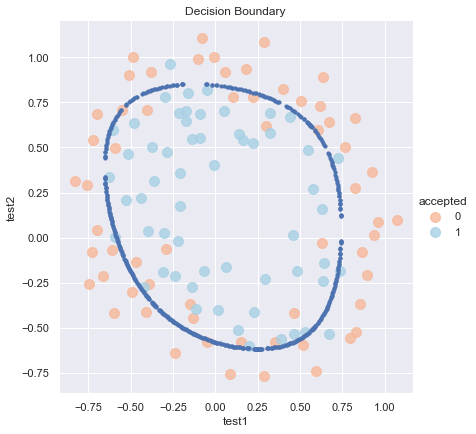

In [25]:
#可以调整不同的l查看
draw_boundary(power=6,l=1)